In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [3]:
train_data = pd.read_csv('clean_train.csv')
train_data

,PassengerId,Name,Title,Sex,Age,AgeCategory,FamilyMembers,Pclass,Ticket,Fare,Embarked,C,Q,S,Survived
0,1,"Braund, Mr. Owen Harris",Mr,1,22.0,Teenager,1,3,A/5 21171,7.2500,S,0.0,0.0,1.0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,0,38.0,Adult,1,1,PC 17599,71.2833,C,1.0,0.0,0.0,1
2,3,"Heikkinen, Miss. Laina",Miss,0,26.0,Youngadult,0,3,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,0,35.0,Youngadult,1,1,113803,53.1000,S,0.0,0.0,1.0,1
4,5,"Allen, Mr. William Henry",Mr,1,35.0,Youngadult,0,3,373450,8.0500,S,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,887,"Montvila, Rev. Juozas",Officer,1,27.0,Youngadult,0,2,211536,13.0000,S,0.0,0.0,1.0,0
884,888,"Graham, Miss. Margaret Edith",Miss,0,19.0,Teenager,0,1,112053,30.0000,S,0.0,0.0,1.0,1
885,889,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,0,28.0,Youngadult,3,3,W./C. 6607,23.4500,S,0.0,0.0,1.0,0
886,890,"Behr, Mr. Karl Howell",Mr,1,26.0,Youngadult,0,1,111369,30.0000,C,1.0,0.0,0.0,1


In [4]:
X = train_data.drop(['PassengerId', 'Name', 'Age',  'Ticket', 'Embarked', 'Survived'], axis = 1)
y = train_data["Survived"]

X

,Title,Sex,AgeCategory,FamilyMembers,Pclass,Fare,C,Q,S
0,Mr,1,Teenager,1,3,7.2500,0.0,0.0,1.0
1,Mrs,0,Adult,1,1,71.2833,1.0,0.0,0.0
2,Miss,0,Youngadult,0,3,7.9250,0.0,0.0,1.0
3,Mrs,0,Youngadult,1,1,53.1000,0.0,0.0,1.0
4,Mr,1,Youngadult,0,3,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
883,Officer,1,Youngadult,0,2,13.0000,0.0,0.0,1.0
884,Miss,0,Teenager,0,1,30.0000,0.0,0.0,1.0
885,Miss,0,Youngadult,3,3,23.4500,0.0,0.0,1.0
886,Mr,1,Youngadult,0,1,30.0000,1.0,0.0,0.0


# One Hot Encoding our Categorical Variables

### Title

In [5]:
oneHot=OneHotEncoder()
encoded_var = oneHot.fit_transform(X[['Title']]).toarray()

title_labels = oneHot.categories_
#print(title_labels)
title_labels = np.array(title_labels).ravel()
print("Title Labels:")
print(title_labels)


title_encoded = pd.DataFrame(encoded_var, columns = title_labels, index = X.index)
X = pd.concat([X, title_encoded], axis = 1)

Title Labels:
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']


### AgeCategory

In [6]:
oneHot=OneHotEncoder()
encoded_var = oneHot.fit_transform(X[['AgeCategory']]).toarray()

age_labels = oneHot.categories_
#print(age_labels)
age_labels = np.array(age_labels).ravel()
print("AgeCategory Labels:")
print(age_labels)

age_encoded = pd.DataFrame(encoded_var, columns = age_labels, index = X.index)
X = pd.concat([X, age_encoded], axis = 1)

AgeCategory Labels:
['Adult' 'Child' 'Elderly' 'Teenager' 'Youngadult']


In [7]:
X.drop(["AgeCategory", "Title"], axis = 1, inplace = True)

X

,Sex,FamilyMembers,Pclass,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty,Adult,Child,Elderly,Teenager,Youngadult
0,1,1,3,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,1,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,3,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1,1,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,3,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1,0,2,13.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
884,0,0,1,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
885,0,3,3,23.4500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
886,1,0,1,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Train-Test Split (0.20)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Exploring Best Features to select

- Since the majority of our dataset are made up of categorical variables, we decided to make use of **chi-squared feature selector**.

## Chi-Squared Test

- Chi-squared test is allows us to test for independence between the differnet categorical variables we have.

<br>

- 2 Hypothesis

  - Null Hypothesis: The 2 Variables are independent.
  - Alternate Hypothesis: The 2 variables are dependent. 
  
  
- The function returns 2 array

  1. Chi-squared statistics
    - the score can be used to select features that have the highest values
  2. p_values
    - if p_value < 0.05, we can safely conclude that the 2 variables are dependent.

In [14]:
X_ch2_train = X_train.copy()
X_ch2_test = X_test.copy()

chi2_scores = chi2(X_ch2_train.drop(["FamilyMembers", "Fare"], axis = 1), y_train)

chi2_scores

(array([80.86087456, 21.48243101, 16.229066  ,  0.18984278,  3.51240742,
         2.81385211, 70.10767609, 92.06651714, 76.45722784,  0.51630112,
         1.05586605,  0.17145833,  6.17051876,  0.78173877,  0.5190163 ,
         0.26402337]),
 array([2.42181451e-19, 3.57085303e-06, 5.61263429e-05, 6.63047499e-01,
        6.09108859e-02, 9.34537267e-02, 5.61540294e-17, 8.38114886e-22,
        2.25034567e-18, 4.72423798e-01, 3.04159941e-01, 6.78818985e-01,
        1.29896514e-02, 3.76609888e-01, 4.71261602e-01, 6.07369423e-01]))

### Chi-Squared Statistics

<AxesSubplot:>

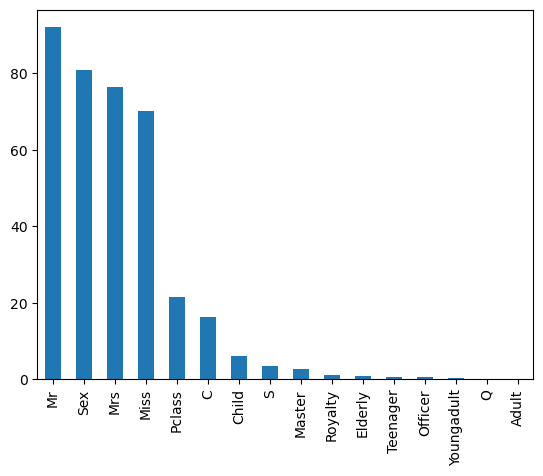

In [15]:
chi_values = pd.Series(chi2_scores[0], index=X_ch2_train.drop(["FamilyMembers", "Fare"], axis = 1).columns)
chi_values.sort_values(ascending=False, inplace=True)

chi_values.plot.bar()

### p_values

<AxesSubplot:>

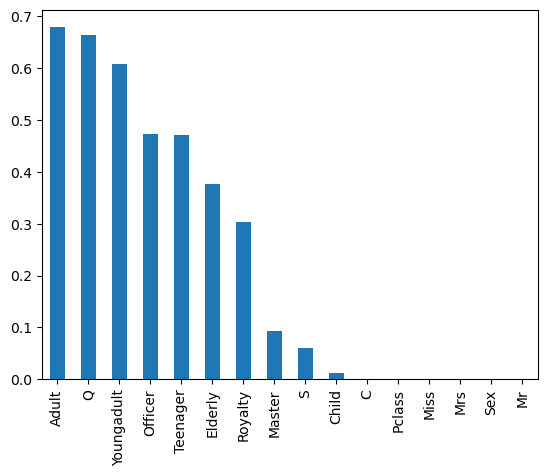

In [16]:
p_values = pd.Series(chi2_scores[1], index=X_ch2_train.drop(["FamilyMembers", "Fare"], axis = 1).columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

##### Analysis

- Based on the p_values, we can see that some of the variables are definitely not as important when predicting survival rate.


- When carrying out our models, we can make use of SelectKBest function to help us with analyse different attempts using different features. 

## Saving as CSV

### Original Train-Test

In [19]:
train_original = pd.concat([X_train, y_train], axis=1)
train_original.to_csv('train_original.csv', index=False)
train_original

,Sex,FamilyMembers,Pclass,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty,Adult,Child,Elderly,Teenager,Youngadult,Survived
633,0,5,3,27.9000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
428,1,0,3,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
488,1,2,3,15.9000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
413,1,0,3,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
358,0,0,3,7.8792,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,1,1,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
809,1,0,2,10.5000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
538,0,2,1,49.5000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
489,1,1,3,19.9667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [20]:
test_original = pd.concat([X_test, y_test], axis=1)
test_original.to_csv('test_original.csv', index=False)
test_original

,Sex,FamilyMembers,Pclass,Fare,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty,Adult,Child,Elderly,Teenager,Youngadult,Survived
300,1,2,3,23.2500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
739,0,4,1,262.3750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
816,1,5,3,27.9000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
273,0,0,3,7.7500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
563,0,0,3,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0,3,3,19.2583,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
5,1,0,3,8.4583,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
753,1,0,3,7.7958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
799,1,3,1,120.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
